# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains:
https://sites.google.com/site/timeserieschain/

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [1]:
import helper.testdata as testdata
import helper.utils as utils
import helper.calculate as calculate
import helper.visualize as visualize

## Penguin (from MP VII) ##
Telemetry collected from a Magellanic penguin. The full data consists of 1,048,575 data points recorded at 40 Hz (about 7.2 hours). We focus on the X-Axis acceleration (the direction of travel for a swimming bird). 

m = 28 (~0.7 s) (MP VII)

m = 25 (Robust Time Series Chain Discovery with Incremental Nearest Neighbors)

m = 20 (own research, interesting results!)

In [2]:
# Parameter
use_case = "chains"
data_name = "penguin"
T = testdata.load_from_csv("../data/" + use_case + "/" + data_name + ".csv", 5?) # TODO wahrscheinlich column 5, aber nochmal rausfinden

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/testdata.py:308: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path, sep='\t', lineterminator='\r', header=None)[5].to_numpy(dtype=np.float64)


### Experiments ###

In [3]:
# Hyperparameter
target_w = 25
dilation_sizes = utils.calculate_dilation_sizes(target_w)

print("Dilation Sizes:", dilation_sizes)

Dilation Sizes: [1, 2, 3, 4, 5]


In [4]:
# calculate
calculate.chains(T, dilation_sizes, target_w, data_name, use_case)

Calculated MP for: w=25, m=25, d=1


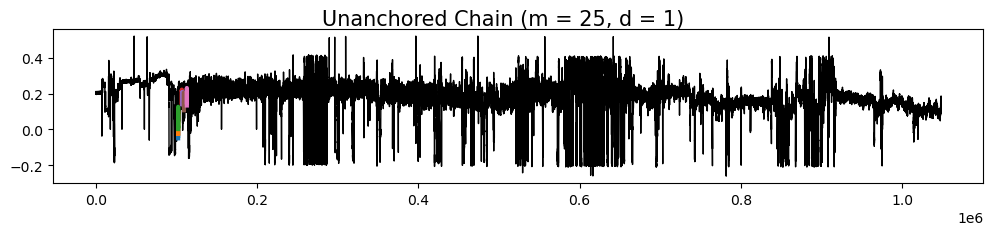

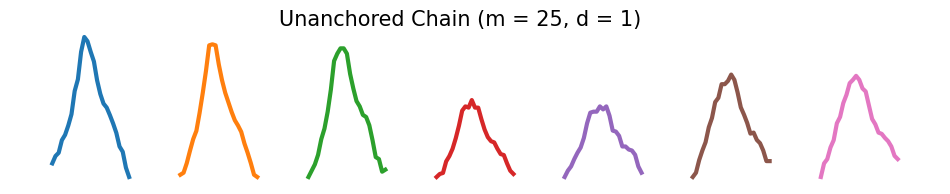

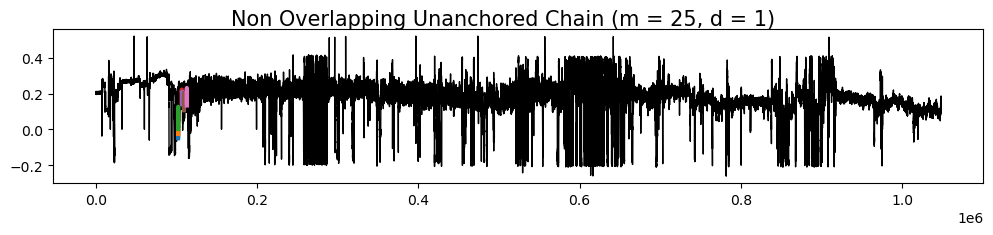

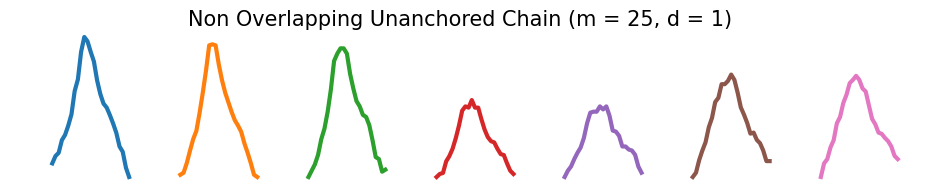

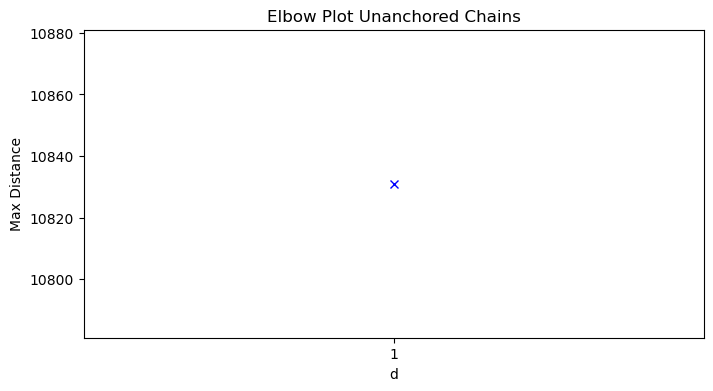

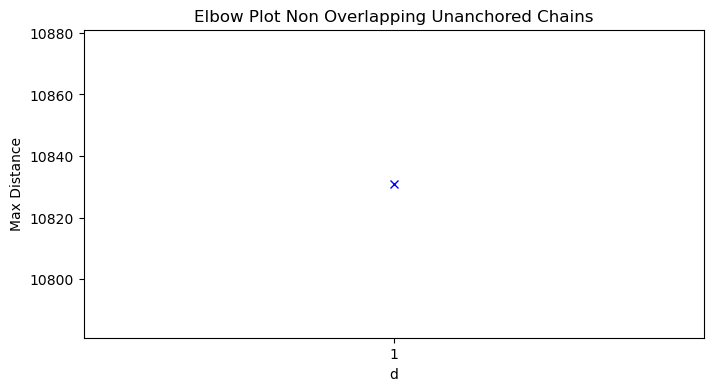

In [5]:
# visualize:
visualize.chains(dilation_sizes, target_w, data_name, use_case)